In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('Car_Purchasing_Data.csv' , encoding='Latin1')

In [3]:
dataset.shape

(500, 9)

In [4]:
dataset.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [5]:
dataset.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
dataset2 = dataset.copy()

In [7]:
dataset2.drop(columns=['Customer Name' , 'Customer e-mail' , 'Country'] , inplace=True)

In [8]:
dataset2.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


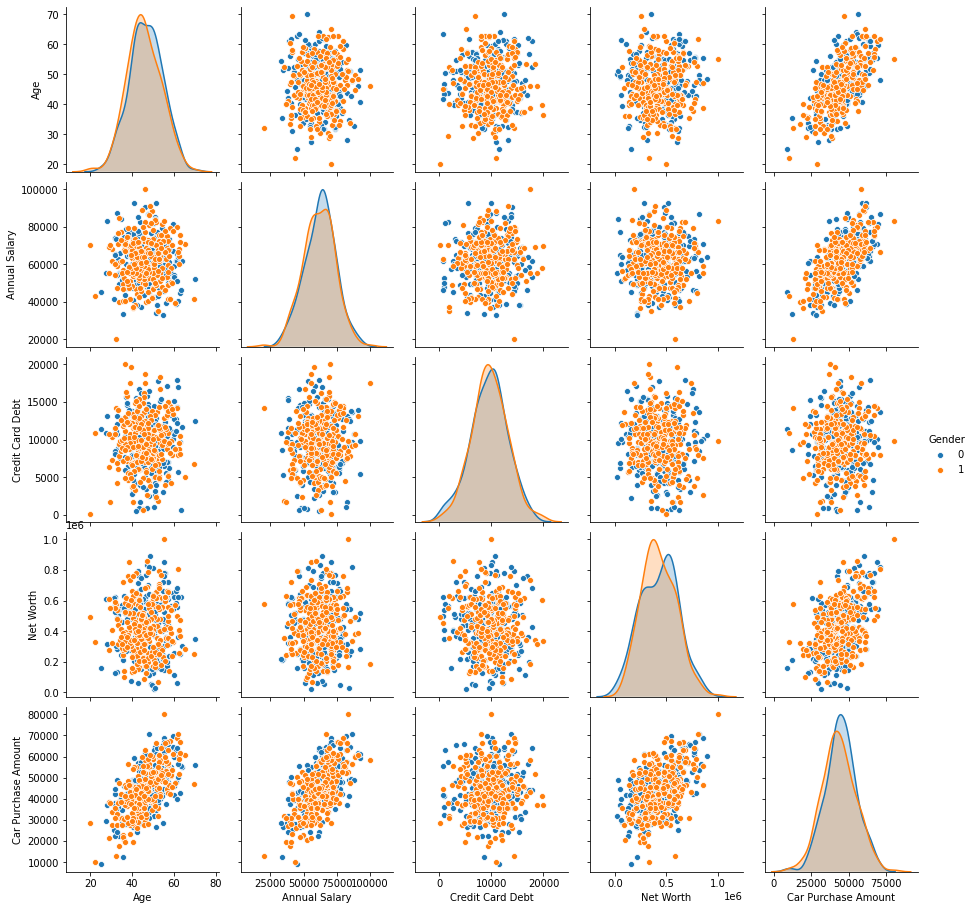

In [10]:
sns.pairplot(dataset2 , hue='Gender' , hue_order=[0,1])

In [11]:
X = dataset2.iloc[: , :-1].values
y=dataset2.iloc[: , -1].values

In [12]:
X[0]

array([0.00000000e+00, 4.18517198e+01, 6.28120930e+04, 1.16093809e+04,
       2.38961250e+05])

In [13]:
y[0]

35321.45877

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y ,test_size=0.2 , random_state=0)

In [15]:
x_train.shape

(400, 5)

In [16]:
y_train.shape

(400,)

In [17]:
y_train = y_train.reshape(-1,1)

In [18]:
y_train.shape

(400, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = sc.fit_transform(y_train)

In [20]:
x_train[0]

array([1.        , 0.5919433 , 0.28041933, 0.3891501 , 0.37352798])

In [21]:
y_train[0]

array([0.36116341])

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [25]:
model = Sequential()
model.add(Dense(units=25 , input_dim=5 , activation='relu'))
model.add(Dense(units=25 , activation='relu'))
model.add(Dense(units=1 , activation='linear'))
model.compile(optimizer='adam' , loss='mean_squared_error')

In [26]:
model.fit(x_train , y_train , epochs=20 , batch_size=25)

Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 0.2066
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 6/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 7/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 8/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 9/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 10/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 11/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 12/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 13/20
16/16 [==============================

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred

array([[0.4165688 ],
       [0.4533452 ],
       [0.28640765],
       [0.59124345],
       [0.39494872],
       [0.61439013],
       [0.6652538 ],
       [0.692109  ],
       [0.4030468 ],
       [0.3556927 ],
       [0.5135125 ],
       [0.64362246],
       [0.6450728 ],
       [0.75590456],
       [0.26330033],
       [0.30932137],
       [0.53856206],
       [0.68766755],
       [0.45723444],
       [0.08693814],
       [0.5466046 ],
       [0.39243475],
       [0.5368293 ],
       [0.26597828],
       [0.7842635 ],
       [0.51413196],
       [0.4807866 ],
       [0.5136157 ],
       [0.6658479 ],
       [0.68893623],
       [0.5505442 ],
       [0.47494364],
       [0.6313121 ],
       [0.467341  ],
       [0.738981  ],
       [0.67168003],
       [0.38635573],
       [0.7170237 ],
       [0.4828051 ],
       [0.4731677 ],
       [0.66073686],
       [0.35601103],
       [0.32193553],
       [0.3797138 ],
       [0.44489637],
       [0.5027503 ],
       [0.4914028 ],
       [0.600

In [29]:
y_pred = sc.inverse_transform(y_pred)

In [30]:
y_pred[0]

array([38576.383], dtype=float32)

In [31]:
y_sample = np.array([[0 , 35 , 62000,11600,230000]])

In [32]:
y_scaled = sc.transform(y_sample)

In [33]:
y_scaled

array([[-0.12676056, -0.12626761,  0.74647887,  0.03661972,  3.11267606]])

In [35]:
sc.inverse_transform(model.predict(y_scaled))

array([[79976.6]], dtype=float32)

In [37]:
model.save('ann.h5')

In [38]:
import pickle

In [39]:
pickle.dump(sc , open('sc.pkl' , 'wb'))

In [ ]:
#Thank you!!